## Importing pandas and numpy library

In [1]:
import pandas as pd
import numpy as np

## Read the dataset, which is in csv format

In [2]:
titanic_data = pd.read_csv("titanic.csv")

## Print the first few rows

In [ ]:
titanic_data.head()

## Check dataset dimensions.. how many row and columns?

In [3]:
titanic_data.shape

(1313, 11)

## List column names

In [4]:
titanic_data.columns

Index(['row.names', 'pclass', 'survived', 'name', 'age', 'embarked',
       'home.dest', 'room', 'ticket', 'boat', 'sex'],
      dtype='object')

## Print column types

In [5]:
titanic_data.dtypes

row.names      int64
pclass        object
survived       int64
name          object
age          float64
embarked      object
home.dest     object
room          object
ticket        object
boat          object
sex           object
dtype: object

## Some more information with info() command

### How many total entries? What are the columns and their types. Each column has how many not-null values?

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 123.1+ KB


## Select Specific columns and print

In [7]:
titanic_data['survived'][0:10]
## or titanic_data.survived

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: int64

In [8]:
## Selecting multiple columns

titanic_data[['survived','age']][0:10]

,survived,age
0,1,29.0000
1,0,2.0000
2,0,30.0000
3,0,25.0000
4,1,0.9167
5,1,47.0000
6,1,63.0000
7,0,39.0000
8,1,58.0000
9,0,71.0000


In [ ]:
titanic_data.survived[0:10]

## How many people survived and what is the percentage?

In [9]:
titanic_data['survived'].value_counts()

0    864
1    449
dtype: int64

In [10]:
titanic_data['survived'].value_counts(normalize=True)

0    0.658035
1    0.341965
dtype: float64

## Get quick statistics of variables

In [11]:
titanic_data.describe()

,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


### pd.corsstab() function is used for categorical variables. 

In [12]:
pd.crosstab( titanic_data.sex, titanic_data.survived )

survived,0,1
sex,,
female,156,307
male,708,142


In [ ]:
pd.crosstab( titanic_data.pclass, titanic_data.survived )

In [ ]:
pd.crosstab( titanic_data.pclass, titanic_data.embarked )

In [ ]:
pd.crosstab( titanic_data.survived, titanic_data.embarked )

## Filtering records based on a condition
### How many children survived who are less than 5 years old?

In [13]:
below_5_years = titanic_data[ titanic_data.age <= 5 ]

In [ ]:
below_5_years[0:5]

In [15]:
len( titanic_data[ titanic_data.age <= 5 ] )

29

In [16]:
titanic_data[ titanic_data.age <= 5 ]["survived"].value_counts()

1    24
0     5
dtype: int64

In [17]:
titanic_data[ titanic_data.age <= 5 ]["survived"].value_counts( normalize = True )

1    0.827586
0    0.172414
dtype: float64

## Get unique values for a column
### How many embark points were there? dataframe.unique() lists unique values of the column

In [18]:
titanic_data.embarked.unique()

array(['Southampton', 'Cherbourg', nan, 'Queenstown'], dtype=object)

## Working with NA values
### Count and drop NA Values

In [19]:
titanic_data.embarked.unique()

array(['Southampton', 'Cherbourg', nan, 'Queenstown'], dtype=object)

In [20]:
len( titanic_data )

1313

In [21]:
titanic_data.embarked.dropna().unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [22]:
len( titanic_data.embarked.dropna().unique() )

3

In [23]:
len( titanic_data[ titanic_data.embarked.notnull() ] )

821

In [24]:
### Remove rows where there are NA values in any of the columns

In [25]:
clean_titanic_data = titanic_data.dropna()

In [26]:
len( clean_titanic_data )

20

In [27]:
clean_titanic_data = titanic_data.dropna( how = "all" )
len( clean_titanic_data )

1313

In [28]:
### Remove columns where all the values are NAs

In [29]:
clean_titanic_data = titanic_data.dropna( axis = 1, how = "all" )
clean_titanic_data.shape

(1313, 11)

## Rename a column

The first column name is row.names. We can change it to rownum. As it is mostly a unique number.

In [30]:
titanic_data.rename( columns = { 'row.names': 'rownum' }, inplace = True  )

In [ ]:
titanic_data.head()

## Indexing and Selecting

Select first 10 rows and all the columns

In [32]:
first_10 = titanic_data[0:10]

In [ ]:
first_10

<b>titanic_data[0:10] is same as titanic_data[:10] <b>

Select only first 3 columns of first 10 rows

In [34]:
first_10_3 = titanic_data.iloc[0:10,0:3]

In [ ]:
first_10_3

## How to access last rows

In [35]:
## Accesising last row
titanic_data[-1:]

,rownum,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


In [ ]:
last_10 = titanic_data[-10:]

In [ ]:
last_10

## Selecting rows and columns and applying a filtering criteria

### Only age, sex and pclass of passengers who have survived

In [36]:
titanic_data[ titanic_data.survived == 1 ][['age', 'sex', 'pclass']][0:5]

,age,sex,pclass
0,29.0000,female,1st
4,0.9167,male,1st
5,47.0000,male,1st
6,63.0000,female,1st
8,58.0000,female,1st


### Only age, sex, survived and pclass of passengers whose age are not known

In [37]:
titanic_data[ titanic_data.age.isnull() ][['age', 'survived', 'sex', 'pclass']][0:5]

,age,survived,sex,pclass
12,NaN,1,female,1st
13,NaN,1,male,1st
14,NaN,0,male,1st
29,NaN,0,male,1st
32,NaN,1,male,1st


### Only age, sex, survived and pclass of passengers whose age are known 

In [38]:
titanic_data[ -titanic_data.age.isnull() ][['age', 'survived', 'sex', 'pclass']][0:5]

,age,survived,sex,pclass
0,29.0000,1,female,1st
1,2.0000,0,female,1st
2,30.0000,0,male,1st
3,25.0000,0,female,1st
4,0.9167,1,male,1st


### Only age, sex, survived and pclass of passengers whose age are known and have survived

In [39]:
titanic_data[ -titanic_data.age.isnull() & titanic_data.survived == 0 ][['age', 'sex', 'pclass']][0:5]

,age,sex,pclass
1,2,female,1st
2,30,male,1st
3,25,female,1st
7,39,male,1st
9,71,male,1st


## Removing rows with null values...

In [40]:
titanic_no_null = titanic_data.dropna()

In [ ]:
titanic_no_null[0:5]

In [42]:
len( titanic_no_null )

20

In [43]:
titanic_no_null = titanic_data[['age','survived','pclass','sex']].dropna()

## Add a new column and map values of an existing column

In [44]:
titanic_data["gender"] = titanic_data.sex.map( lambda x: int( x == 'male') )

In [ ]:
titanic_data.head()

In [45]:
len( titanic_no_null )

633

In [46]:
titanic_no_null[0:5]

,age,survived,pclass,sex
0,29.0000,1,1st,female
1,2.0000,0,1st,female
2,30.0000,0,1st,male
3,25.0000,0,1st,female
4,0.9167,1,1st,male


## Finding basic statistics and dawing a basic distribution plot

In [47]:
titanic_no_null.describe()

,age,survived
count,633.000000,633.000000
mean,31.194181,0.443918
std,14.747525,0.497238
min,0.166700,0.000000
25%,21.000000,0.000000
50%,30.000000,0.000000
75%,41.000000,1.000000
max,71.000000,1.000000


In [48]:
mean_age = titanic_no_null.age.mean()
mean_age

31.19418104265403

In [49]:
std_age = titanic_no_null.age.std()
std_age

14.747525275652212

In [50]:
titanic_no_null[titanic_no_null.survived == 1]['age'].mean()

29.873961921708187

In [51]:
titanic_no_null[titanic_no_null.survived == 1 & titanic_no_null.sex.str.startswith( 'female' )]['age'].mean()

32.43491124260355

In [52]:
titanic_no_null[titanic_no_null.survived == 1 & titanic_no_null.sex.str.startswith( 'male' )]['age'].mean()

26.201719047619044

In [53]:
titanic_no_null[titanic_no_null.survived == 0]['age'].mean()

32.24810596590909

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  35.,   24.,  107.,  138.,  105.,   79.,   66.,   40.,   25.,   14.]),
 array([  0.1667 ,   7.25003,  14.33336,  21.41669,  28.50002,  35.58335,
         42.66668,  49.75001,  56.83334,  63.91667,  71.     ]),
 <a list of 10 Patch objects>)

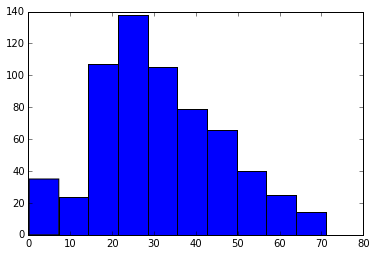

In [55]:
plt.hist( titanic_no_null.age )

(array([  26.,   20.,   13.,   69.,  103.,   83.,   81.,   64.,   42.,
          53.,   30.,   23.,   18.,    4.,    4.,    0.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.]),
 <a list of 16 Patch objects>)

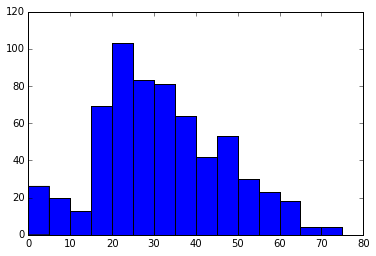

In [56]:
plt.hist( titanic_no_null.age, bins=16, range=(0,80))

{'boxes': [<matplotlib.lines.Line2D at 0x613a198>],
 'caps': [<matplotlib.lines.Line2D at 0x6141438>,
 'fliers': [<matplotlib.lines.Line2D at 0x6146b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x61463c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x613a438>,
  <matplotlib.lines.Line2D at 0x613ac50>]}

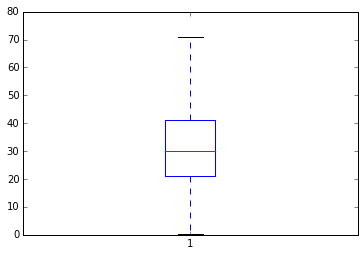

In [57]:
plt.boxplot( titanic_no_null.age )